In [34]:
import torch
import torchaudio

import torchaudio.functional as F

def resample_audio(input_filename, target_sample_rate):
    # Load the audio file
    waveform, sample_rate = torchaudio.load(input_filename)

    # Create a resample transform
    resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)

    # Apply the resample transform to the waveform
    resampled_waveform = resampler(waveform)

    return resampled_waveform, target_sample_rate


def RIR_Filtering(input_filename, output_filename, rir_filepath):
    device = torch.device("cpu")#"cuda" if torch.cuda.is_available() else "cpu")

    waveform, sample_rate = torchaudio.load(input_filename)
    waveform = waveform.to(device)  # Move the waveform tensor to the GPU

    rir_raw, rir_sample_rate = torchaudio.load(rir_filepath)

    rir_raw = rir_raw.to(device)  # Move the RIR tensor to the GPU

    #Fix and normalize raw rir vector
    rir = rir_raw[:, int(sample_rate * 0.0) : int(sample_rate * 0.2)]
    rir = rir / torch.linalg.vector_norm(rir, ord=2)

    # If the RIR file has a different sample rate, resample it
    if rir_sample_rate != sample_rate:
        rir , _ = resample_audio(rir_filepath, sample_rate)
        rir = rir.to(device)  # Move the resampled RIR tensor to the GPU

    # Apply the RIR to the audio file
    augmented_waveform = F.fftconvolve(waveform, rir)
    #print("RIR FILTERING COMPLETED WITH FILE: " + str(rir_filepath)+ "TO FILE: " + str(output_filename)
    # Save the resulting noisy signal to a new audio file
    # Save the augmented audio to the output file
    torchaudio.save(output_filename, augmented_waveform.cpu(), sample_rate, format="wav",encoding='PCM_S', bits_per_sample=16)  # Move the tensor back to the CPU for saving

RIR_Filtering("lt400small/common_voice_ca_17852479.wav", "common_voice_ca_17852479AUG.wav", "../program_samples/AIR_Database_Mono/air_type1_air_binaural_aula_carolina_1_1_90_3.wav")

In [2]:
from vosk import Model, KaldiRecognizer, SetLogLevel

#!/usr/bin/env python3

import wave
import sys

from vosk import Model, KaldiRecognizer, SetLogLevel

# You can set log level to -1 to disable debug messages
SetLogLevel(0)

wf = wave.open("common_voice_ca_17852479AUG.wav", "rb")
print("p")
print(wf.getnchannels())
print(wf.getsampwidth())
print(wf.getcomptype())
if wf.getnchannels() != 1 or wf.getsampwidth() != 2 or wf.getcomptype() != "NONE":
    print("Audio file must be WAV format mono PCM.")
    sys.exit(1)

model = Model(lang="ca")

# You can also init model by name or with a folder path
# model = Model(model_name="vosk-model-en-us-0.21")
# model = Model("models/en")

rec = KaldiRecognizer(model, wf.getframerate())
rec.SetWords(True)
rec.SetPartialWords(True)

while True:
    data = wf.readframes(4000)
    if len(data) == 0:
        break
    if rec.AcceptWaveform(data):
        print(rec.Result())
        print("pito")
    else:
        print(rec.PartialResult())
        print("pitopito")

print(rec.FinalResult())


p
1
2
NONE


LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=10 max-active=3000 lattice-beam=2
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:6:7:8:9:10
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 1 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 2 orphan components.
LOG (VoskAPI:Collapse():nnet-utils.cc:1488) Added 1 components, removed 2
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /home/lucastakanori/.cache/vosk/vosk-model-small-ca-0.4/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:282) Loading HCL and G from /home/lucastakanori/.cache/vosk/vosk-model-small-ca-0.4/graph/HCLr.fst /home/lucastakanori/.cache/vosk/vosk-model-small-ca-0.4/graph/Gr.fst
LOG (VoskAPI:ReadDataFiles():model.cc:308) Loading winfo /

{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : ""
}
pitopito
{
  "partial" : "no puc venir",
  "partial_result" : [{
      "conf" : 1.000000,
      "end" : 0.240000,
      "start" : 0.030000,
      "word" : "no"
    }, {
      "conf" : 1.000000,
     

In [9]:
import os
import json
import pandas as pd
model = Model(lang="ca")
transcriptions = []
file = "common_voice_ca_17852479AUG.wav"
#file = "upc_ca_ona_100000AUG.wav"
output_filename="test"

wf = wave.open(file, "rb")

rec = KaldiRecognizer(model, wf.getframerate())
rec.SetWords(True)
rec.SetPartialWords(True)

# Process the audio file
second_last= None
last = None
currentpartial = None
while True:
    data = wf.readframes(4000)
    if len(data) == 0:
        break     
    if rec.AcceptWaveform(data):
        if(last != None):
            second_last = last
        last = rec.Result()
    else:
        currentpartial = rec.PartialResult()     
        #print(currentpartial)       
    #if rec.AcceptWaveform(data):
#print(second_last)
#print(last)
#print(currentpartial) 


#res = json.loads(second_last)
#print(res["text"])

result_json = rec.Result()
result_dict = json.loads(result_json)
if(result_dict["text"] == ""):
    try:
        result_dict = json.loads(last)  
        if(result_dict["text"] == ""):
            result_dict = json.loads(second_last)  
            if(result_dict["text"] == ""):
                print("Error")
    except:
        print("Error") 
#results = result_dict["result"]
transcriptions.append((os.path.basename(file), result_dict["text"]))
#print(result_dict["text"])
        

# Convert the list of transcriptions to a DataFrame
transcriptions_df = pd.DataFrame(transcriptions, columns=['filename', 'transcription'])

# Save the output to a TSV file
output_file_path = os.path.join(output_filename)
transcriptions_df.to_csv(output_file_path, sep="\t", index=False)
print("TRANSCRIPT DONE FILE SAVED IN FILE: " + str(output_file_path))


LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=10 max-active=3000 lattice-beam=2
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:6:7:8:9:10
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 1 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 2 orphan components.
LOG (VoskAPI:Collapse():nnet-utils.cc:1488) Added 1 components, removed 2
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /home/lucastakanori/.cache/vosk/vosk-model-small-ca-0.4/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:282) Loading HCL and G from /home/lucastakanori/.cache/vosk/vosk-model-small-ca-0.4/graph/HCLr.fst /home/lucastakanori/.cache/vosk/vosk-model-small-ca-0.4/graph/Gr.fst
LOG (VoskAPI:ReadDataFiles():model.cc:308) Loading winfo /

TRANSCRIPT DONE FILE SAVED IN FILE: test


In [12]:
import numpy
import torch
import matplotlib.pyplot as plt
import torchaudio
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    waveform = waveform.numpy()

    num_channels, _ = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)




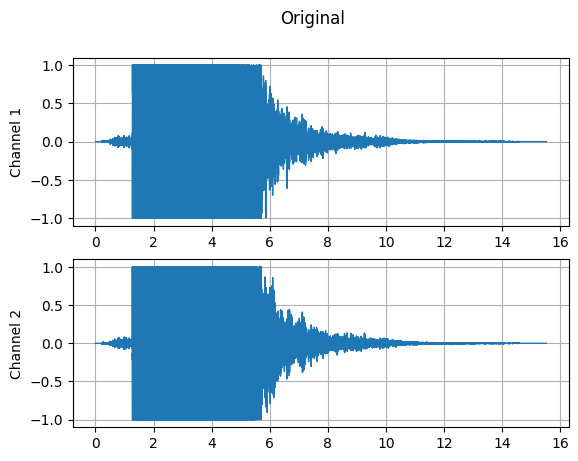

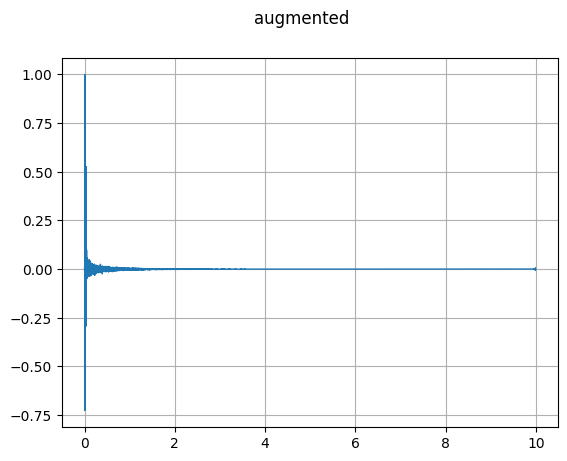

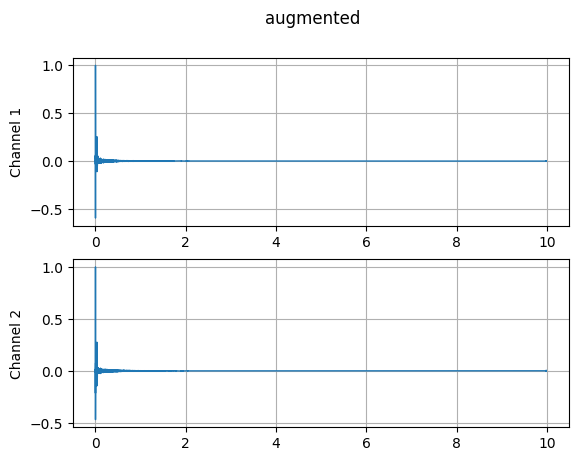

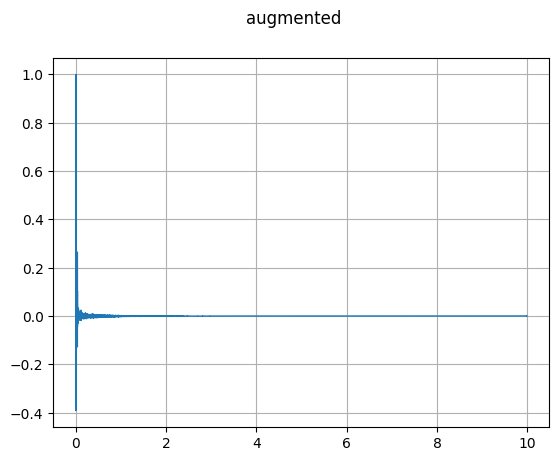

In [14]:
waveform, sample_rate = torchaudio.load("common_voice_ca_19911316.wav")
plot_waveform(waveform.cpu(), sample_rate, title="Original")

waveform, sample_rate = torchaudio.load("air_type1_air_binaural_aula_carolina_1_2_90_3.wav")
plot_waveform(waveform.cpu(), sample_rate, title="augmented")

waveform, sample_rate = torchaudio.load("../program_samples/real_rirs_isotropic_noises/air_type1_air_binaural_aula_carolina_1_1_90_3.wav")
plot_waveform(waveform.cpu(), sample_rate, title="augmented")

waveform, sample_rate = torchaudio.load("../program_samples/AIR_Database_Mono/air_type1_air_binaural_aula_carolina_1_1_90_3.wav")
plot_waveform(waveform.cpu(), sample_rate, title="augmented")

In [12]:
import os
import torch
import torchaudio

# Specify the source and destination directories
source_dir = '../program_samples/real_rirs_isotropic_noises'
dest_dir = '../program_samples/AIR_Database_Mono'

# Iterate over all files in the source directory
print(os.listdir(source_dir))
for filename in os.listdir(source_dir):
   # Check if the file is a .wav file
   if filename.endswith('.wav'):
       # Load the audio file
       waveform, sample_rate = torchaudio.load(os.path.join(source_dir, filename))
       
       # Check if the audio is stereo
       if waveform.shape[0] == 2:
           # Convert the stereo audio to mono
           waveform_mono = torch.mean(waveform, dim=0).unsqueeze(0)
           
           # Save the mono audio to the destination directory
           torchaudio.save(os.path.join(dest_dir, filename), waveform_mono, sample_rate)




['air_type1_air_binaural_stairway_1_2_105.wav', 'air_type1_air_binaural_stairway_1_3_105.wav', 'air_type1_air_binaural_stairway_1_1_15.wav', 'air_type1_air_binaural_meeting_1_1.wav', 'air_type1_air_binaural_aula_carolina_1_3_180_3.wav', 'air_type1_air_binaural_stairway_1_1_30.wav', 'air_type1_air_binaural_stairway_1_1_180.wav', 'air_type1_air_phone_stairway2_hfrp.wav', 'air_type1_air_binaural_office_1_1.wav', 'air_type1_air_binaural_stairway_1_3_15.wav', 'air_type1_air_binaural_booth_1_3.wav', 'air_type1_air_binaural_stairway_1_1_120.wav', 'air_type1_air_binaural_stairway_1_2_150.wav', 'air_type1_air_phone_lecture_hhp.wav', 'air_type1_air_binaural_lecture_0_1.wav', 'air_type1_air_binaural_stairway_1_1_45.wav', 'air_type1_air_binaural_aula_carolina_1_2_90_3.wav', 'air_type1_air_phone_lecture1_hhp.wav', 'air_type1_air_binaural_booth_1_2.wav', 'air_type1_air_binaural_meeting_1_5.wav', 'air_type1_air_phone_bt_office_hhp.wav', 'air_type1_air_binaural_lecture_1_5.wav', 'air_type1_air_binaura

In [3]:
import os
import json
import pandas as pd
import wave
from vosk import Model, KaldiRecognizer, SetLogLevel

model = Model(lang="ca")
transcriptions = []
file = "upc_ca_pau_101027.wav"
#file = "upc_ca_ona_100000AUG.wav"
output_filename="test"

wf = wave.open(file, "rb")

rec = KaldiRecognizer(model, wf.getframerate())
rec.SetWords(True)
rec.SetPartialWords(True)

# Process the audio file
second_last= None
last = None
currentpartial = None
while True:
    data = wf.readframes(4000)
    if len(data) == 0:
        break     
    if rec.AcceptWaveform(data):
        if(last != None):
            second_last = last
        last = rec.Result()
    else:
        currentpartial = rec.PartialResult()     
        print(currentpartial)       
    #if rec.AcceptWaveform(data):

print("SECOND")
print(second_last)
print("LAST")
print(last)
print("CURRENT")
print(currentpartial) 


#res = json.loads(second_last)
#print(res["text"])



result_json = rec.Result()
dict_partial = json.loads(result_json)
result_dict = dict_partial
if(dict_partial["text"] == ""):
    try:
        if(last != None):
            dict_last = json.loads(last) 
        else:
            dict_last = {"text": ""}
        if(second_last != None):
            dict_second_last = json.loads(second_last)
        else:
            dict_second_last = {"text": ""}
        if(len(dict_last["text"]) > len(dict_second_last["text"])):
            result_dict = dict_last
        elif(len(dict_last["text"]) < len(dict_second_last["text"])):
            result_dict = dict_second_last
        else:
            print("first")
            print(dict_partial["text"])
            print("second")
            print(dict_last["text"])
            print("third")
            print(dict_second_last["text"])
            print("Error?")
    except:
        print("Error!") 


#results = result_dict["result"]
print("saved")
print(result_dict["text"])
transcriptions.append((os.path.basename(file), result_dict["text"]))

        

# Convert the list of transcriptions to a DataFrame
transcriptions_df = pd.DataFrame(transcriptions, columns=['filename', 'transcription'])

# Save the output to a TSV file
output_file_path = os.path.join(output_filename)
transcriptions_df.to_csv(output_file_path, sep="\t", index=False)
print("TRANSCRIPT DONE FILE SAVED IN FILE: " + str(output_file_path))


LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=10 max-active=3000 lattice-beam=2
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:6:7:8:9:10
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 1 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 2 orphan components.
LOG (VoskAPI:Collapse():nnet-utils.cc:1488) Added 1 components, removed 2
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /home/lucastakanori/.cache/vosk/vosk-model-small-ca-0.4/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:282) Loading HCL and G from /home/lucastakanori/.cache/vosk/vosk-model-small-ca-0.4/graph/HCLr.fst /home/lucastakanori/.cache/vosk/vosk-model-small-ca-0.4/graph/Gr.fst
LOG (VoskAPI:ReadDataFiles():model.cc:308) Loading winfo /

{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial" : ""
}
{
  "partial"

In [ ]:
print("llovarros del mat 🦈")


In [ ]:

def transcribe_files_to_tsv(input_folder, output_folder, output_filename):
   # Set the log level to 0 to disable debug messages
   SetLogLevel(0)

   model = Model(lang="ca")
   transcriptions = []

   # Iterate through all files in the input folder
   for file in os.listdir(input_folder):
      #print(os.path.basename(file))
      if file.endswith(".wav"):
      
         #wf = wave.read("upc_ca_ona_100043.wav")

         wf = wave.open(os.path.join(input_folder, file))

         rec = KaldiRecognizer(model, wf.getframerate())
         rec.SetWords(True)
         rec.SetPartialWords(True)

         # Process the audio file
         second_last= None
         last = None
         currentpartial = None
         while True:
            data = wf.readframes(4000)
            if len(data) == 0:
               break     
            if rec.AcceptWaveform(data):
               if(last != None):
                     second_last = last
               last = rec.Result()
            else:
               currentpartial = rec.PartialResult()     
               #print(currentpartial)       
            #if rec.AcceptWaveform(data):
         #print(second_last)
         #print(last)
         #print(currentpartial) 


         #res = json.loads(second_last)
         #print(res["text"])

         result_json = rec.Result()
         result_dict = json.loads(result_json)
         if(result_dict["text"] == ""):
            try:
               result_dict = json.loads(last)  
               if(result_dict["text"] == ""):
                     result_dict = json.loads(second_last)  
                     if(result_dict["text"] == ""):
                        print("Error")
            except:
               print("Error") 
         #results = result_dict["result"]
         transcriptions.append((os.path.basename(file), result_dict["text"]))
         #print(result_dict["text"])                      

   # Convert the list of transcriptions to a DataFrame
   transcriptions_df = pd.DataFrame(transcriptions, columns=['filename', 'transcription'])

   # Save the output to a TSV file
   output_file_path = os.path.join(output_folder, output_filename)
   transcriptions_df.to_csv(output_file_path, sep="\t", index=False)
   print("TRANSCRIPT DONE FILE SAVED IN FILE: " + str(output_file_path))